In [2]:
!pip install scikit-image


   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
    --------------------------------------- 0.3/12.9 MB ? eta -:--:--
   --- ------------------------------------ 1.0/12.9 MB 2.8 MB/s eta 0:00:05
   ---- ----------------------------------- 1.6/12.9 MB 2.7 MB/s eta 0:00:05
   ------ --------------------------------- 2.1/12.9 MB 2.6 MB/s eta 0:00:05
   -------- ------------------------------- 2.6/12.9 MB 2.6 MB/s eta 0:00:04
   --------- ------------------------------ 3.1/12.9 MB 2.6 MB/s eta 0:00:04
   ----------- ---------------------------- 3.7/12.9 MB 2.5 MB/s eta 0:00:04
   ------------- -------------------------- 4.2/12.9 MB 2.5 MB/s eta 0:00:04
   -------------- ------------------------- 4.7/12.9 MB 2.6 MB/s eta 0:00:04
   ----------------- ---------------------- 5.5/12.9 MB 2.6 MB/s eta 0:00:03
   ------------------ --------------------- 6.0/12.9 MB 2.6 MB/s eta 0:00:03
   -------------------- ------------------- 6.6/12.9 MB 2.6 MB/s eta 0:00:03
   ----------

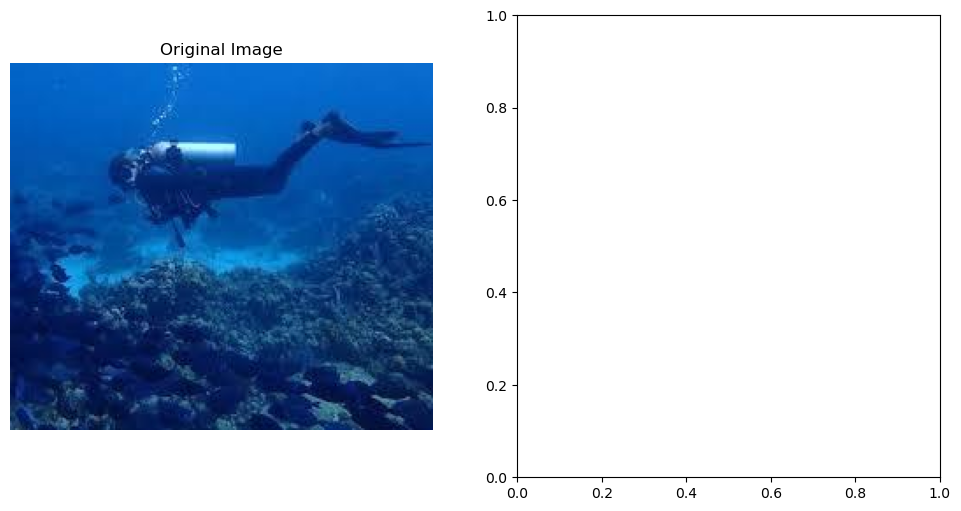

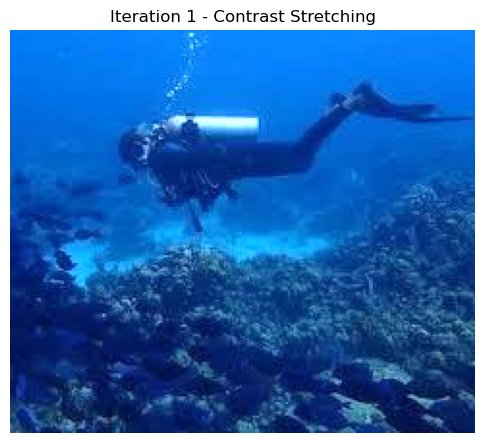

Iteration 1 - Step: contrast stretching
PSNR: 21.43
SSIM: 0.97


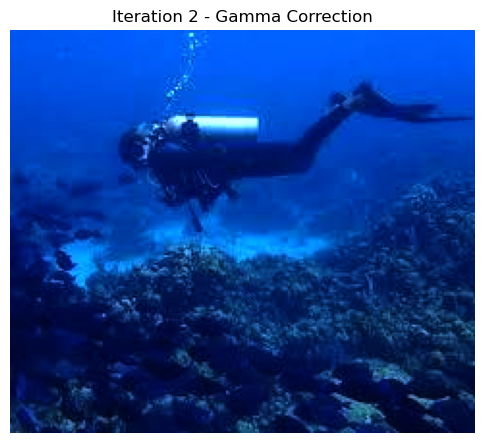

Iteration 2 - Step: gamma correction
PSNR: 23.28
SSIM: 0.82


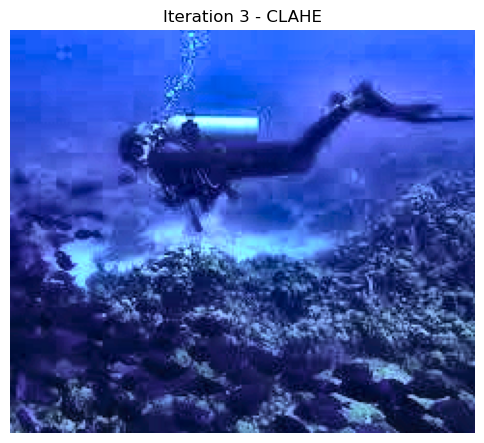

Iteration 3 - Step: clahe
PSNR: 16.94
SSIM: 0.65


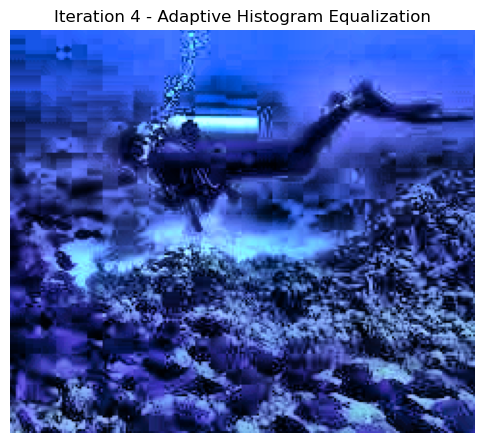

Iteration 4 - Step: adaptive histogram equalization
PSNR: 15.13
SSIM: 0.47


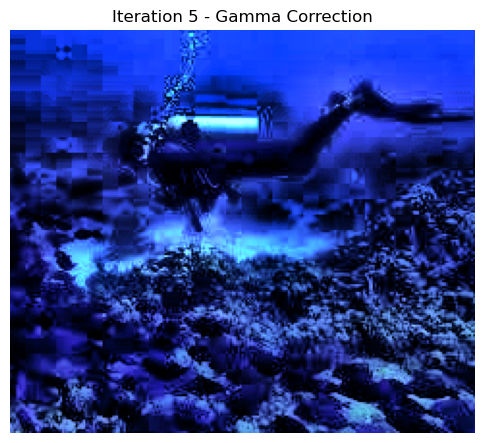

Iteration 5 - Step: gamma correction
PSNR: 15.49
SSIM: 0.52

Summary of Evaluation Metrics for Each Step:
Iteration 1 - Step: contrast stretching
PSNR: 21.43, SSIM: 0.97
Iteration 2 - Step: gamma correction
PSNR: 23.28, SSIM: 0.82
Iteration 3 - Step: clahe
PSNR: 16.94, SSIM: 0.65
Iteration 4 - Step: adaptive histogram equalization
PSNR: 15.13, SSIM: 0.47
Iteration 5 - Step: gamma correction
PSNR: 15.49, SSIM: 0.52


In [6]:
from skimage import io, exposure, color
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
from skimage import img_as_ubyte

# Load the image
image_path = 'C:/Users/kusum/Desktop/raw-890/323_img_.png'
image = io.imread(image_path)

# Initial Parameters for Processing
gamma_value = 1.5

# Define Enhancement Functions
def contrast_stretching(image):
    p2, p98 = np.percentile(image, (2, 98))
    stretched_image = exposure.rescale_intensity(image, in_range=(p2, p98))
    return img_as_ubyte(stretched_image)

def gamma_correction(image, gamma):
    corrected_image = exposure.adjust_gamma(image, gamma)
    return img_as_ubyte(corrected_image)

def apply_clahe(image):
    lab = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
    l, a, b = cv2.split(lab)

    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    cl = clahe.apply(l)

    merged_lab = cv2.merge((cl, a, b))
    clahe_image = cv2.cvtColor(merged_lab, cv2.COLOR_LAB2RGB)
    return clahe_image

def adaptive_histogram_equalization(image):
    equalized_image = exposure.equalize_adapthist(image, clip_limit=0.03)
    return img_as_ubyte(equalized_image)

# Define Processing Sequence
# You can change the sequence below to use any enhancement function in any order
steps = ["contrast stretching", "gamma correction", "clahe", "adaptive histogram equalization", "gamma correction"]

# Process the Image Step-by-Step
processed_image = np.copy(image)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[0].axis('off')

# Store metrics for each step
metric_results = []

for i, step in enumerate(steps):
    if step == "contrast stretching":
        processed_image = contrast_stretching(processed_image)
        plt.figure(figsize=(6, 6))
        plt.imshow(processed_image)
        plt.title(f'Iteration {i + 1} - Contrast Stretching')
        plt.axis('off')
        plt.show()

    elif step == "gamma correction":
        processed_image = gamma_correction(processed_image, gamma_value)
        plt.figure(figsize=(6, 6))
        plt.imshow(processed_image)
        plt.title(f'Iteration {i + 1} - Gamma Correction')
        plt.axis('off')
        plt.show()

    elif step == "clahe":
        processed_image = apply_clahe(processed_image)
        plt.figure(figsize=(6, 6))
        plt.imshow(processed_image)
        plt.title(f'Iteration {i + 1} - CLAHE')
        plt.axis('off')
        plt.show()

    elif step == "adaptive histogram equalization":
        processed_image = adaptive_histogram_equalization(processed_image)
        plt.figure(figsize=(6, 6))
        plt.imshow(processed_image)
        plt.title(f'Iteration {i + 1} - Adaptive Histogram Equalization')
        plt.axis('off')
        plt.show()

    # Calculate Evaluation Metrics After Each Step
    current_psnr = psnr(image, processed_image, data_range=processed_image.max() - processed_image.min())
    
    # Updated SSIM Calculation
    current_ssim = ssim(image, processed_image, win_size=5, channel_axis=-1)
    
    metric_results.append((i + 1, step, current_psnr, current_ssim))

    print(f"Iteration {i + 1} - Step: {step}")
    print(f"PSNR: {current_psnr:.2f}")
    print(f"SSIM: {current_ssim:.2f}")
    print("=" * 50)

# Display Summary of Metrics
print("\nSummary of Evaluation Metrics for Each Step:")
for result in metric_results:
    iteration, step, psnr_value, ssim_value = result
    print(f"Iteration {iteration} - Step: {step}")
    print(f"PSNR: {psnr_value:.2f}, SSIM: {ssim_value:.2f}")
    print("=" * 50)
